<h2><center><font color=#D40004><u>One vs All - Polynomial transformation with Adaline </u></font></center></h2>
<h3><center>Groupe: Mohammed NECHBA, Yassine SEDJARI, Mohammed MOUHAJIR </center></h3>
<center> 2st year Artificial Intelligence Engineering student at ENSIAS Rabat (Morocco) </center>
<br> 
<center> Prof. Abdellatif EL AFIA</center>

# <font color='green'><u> Table of Contents:</u></font> <br>

1. [Importing/Loading & checking the data.](#1)
1. [Polynomial transformation.](#2)
1. [Adaline.](#3)
1. [Training & Testing for data linear separable.](#4)
1. [Training & Testing for data linear separable noise.](#5)
1. [Training & Testing for data no linear separable.](#6)

<a id = "1"></a><br>
# <font color="green"><u> I. Importing/Loading & Visualize the data:</u></font>

In [94]:
# numpy pour les opérations d'algébre linéaire sur les vecteurs et les matrices.
import numpy as np
# calculations
import math
# plotting vizualisation
import matplotlib.pyplot as plt
# pandas for read dataset
import pandas as pd
#plt.style.use('dark_background')

In [95]:
df_l_s = pd.read_csv("linearly_separable.csv")
df_l_s_n = pd.read_csv("linearly_separable_noise.csv")
df_n_l_s = pd.read_csv("no_linearly_separable.csv")

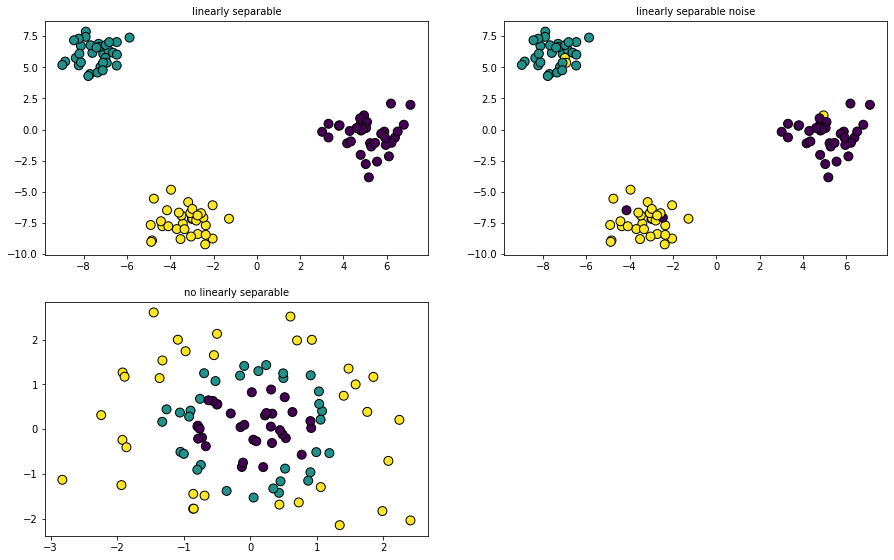

In [96]:
fig= plt.figure(figsize=(13, 13))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("linearly separable", fontsize="medium")
X1, Y1 = df_l_s[['x1','x2']].to_numpy(), df_l_s['y'].to_numpy()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=80, edgecolor="k")

plt.subplot(322)
plt.title("linearly separable noise", fontsize="medium")
X1, Y1 = df_l_s_n[['x1','x2']].to_numpy(), df_l_s_n['y'].to_numpy()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=80, edgecolor="k")

plt.subplot(323)
plt.title("no linearly separable", fontsize="medium")
X2, Y2 =df_n_l_s[['x1','x2']].to_numpy(), df_n_l_s['y'].to_numpy()
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=80, edgecolor="k")


In [97]:
def plot2D( X,y,w_list):
    x1=[]
    y1=[]
    for point in X:
        x1.append(point[0])
        y1.append(point[1])
    colors = y
    
    fig=plt.figure(figsize=(12,8))
    plt.scatter(x1, y1, s=100 ,c=colors, alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    i=1
    for w in w_list:
        alpha = -w[1]/w[2]
        beta = -w[0]/w[2]
        decision_boundary = lambda x : alpha*x + beta
        if i==1:
            x2 = np.array([-3,2])
        else:
            x2 = np.array([-9,6])
            
                          
        y2 = decision_boundary(x2)
        plt.plot(x2,y2,label = "classifier "+str(i))
        i+=1
    plt.legend()


<a id = "2"></a><br>
# <font color="green"><u> II.Polynomial transformation:</u></font>

In [98]:
from itertools import chain, combinations
from itertools import combinations_with_replacement as combinations_w_r

def PolynomialExpansion(
        
        X, max_degree ,min_degree=0):
        
        """
        
        Parameters :
        ------------
        
        X : the input matrix that contains all examples , of shape(#exapmles , #features)
        
        
        """
        
        n_features= X.shape[1]
        n_examples= X.shape[0]
        
        # combinations_w_r  = combination with repitition (=in french : "arrangement avec répétiton")
        
        comb = combinations_w_r
        start = 1
        
        iter = chain.from_iterable(
            comb(range(n_features), i) for i in range(start, max_degree + 1)
        )
        
        #convert the 'iter' into a list
        
        list_combinations =list(iter)
        
        print("the combinations are  = ", list_combinations)
        print("len(list_iter)=", len( list_combinations) )
        print()
        
        XP=np.zeros( [n_examples,len(list_combinations)] )
    
        
     
        
        for i, comb in enumerate(list_combinations):
               """print("hello we are in for loop of Polynomial expension ")
               print("comb = ",comb)
               print("X[:,comb].prod(1) = ", X[:,comb].prod(1))"""
               XP[:, i] = X[:, comb].prod(1)
        
        #now we'll add the bias term
        XP=np.insert(XP,0,1,axis=1)
        print("we have finished the polynomial expension")
        return XP


<a id = "3"></a><br>
# <font color="green"><u> III.Adaline:</u></font>

In [99]:
def _get_cls_map( y):
    return np.where(y <= 0, -1, 1)

def indecatrice( w, x, y):
        if np.sign(np.dot(w,x))!=y :
            return 1
        return 0
def Ls( w, x, y):
        n = len(y)
        s=0
        for i in range(n):
            s+= indecatrice( w,x[i],y[i])
        return s/n
def Adaline(w, X, y,max_iter):
        y = _get_cls_map(y)
    
        for i in range(max_iter):
            for j in range(len(y)):
                e =y[j]- np.dot(w,X[j])
                if  e :
                    w=w+0.01*2*e*X[j]
        return w
    


<a id = "4"></a><br>
# <font color="green"><u> IV. Training & Testing for data linear separable:</u></font>

> ## Training

In [100]:
x, y = df_l_s[['x1','x2']].to_numpy(), df_l_s['y'].to_numpy()

In [101]:
numFeatures = x.shape[ 1 ] # 2 caractéristiques
numLabels = 3  # 3 class

In [102]:
# Ajouter une colonne initiale de uns à notre matrice de caractéristiques pour prendre 
# en compte le terme d'interception :
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x

In [103]:
#  Créons un tableau pour stocker les paramètres du modèle w pour chaque classificateu
classifiers = np.zeros(shape=(numLabels, numFeatures + 1))

In [104]:
# Then we’re going to train 3 binary classifiers targeted for each class inside a for loop:
for c in range(0, numLabels):
    label = (y == c).astype(int)
    initial_w = np.ones(X.shape[1])
    classifiers[c, :] = Adaline(initial_w, X, label, max_iter=8)


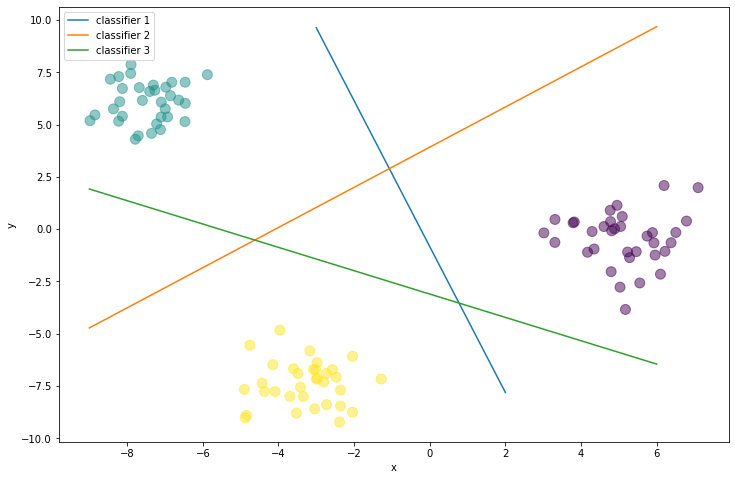

In [105]:
plot2D( x,y,classifiers)

>## Predictions

In [106]:
# Nous pouvons évaluer les estimations de probabilité de notre
# modèle optimisé pour chaque classe comme suit :
classProbabilities = X @ classifiers.transpose()

In [107]:
# Nous pouvons connaître les prédictions de notre modèle en sélectionnant simplement l'étiquette 
# avec la probabilité la plus élevée dans chaque ligne :
predictions = classProbabilities.argmax(axis=1)

>## Accuracy

In [108]:
print("Training accuracy:", str(100 * np.mean(predictions == y)) + "%")

Training accuracy: 100.0%


<a id = "5"></a><br>
# <font color="green"><u> V. Training & Testing for data linear separable noise:</u></font>

> ## Training

In [109]:
x, y = df_l_s_n[['x1','x2']].to_numpy(), df_l_s_n['y'].to_numpy()

In [110]:
numFeatures = x.shape[ 1 ] # 2 caractéristiques
numLabels = 3  # 3 class

In [111]:
# Ajouter une colonne initiale de uns à notre matrice de caractéristiques pour prendre 
# en compte le terme d'interception :
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x

In [112]:
#  Créons un tableau pour stocker les paramètres du modèle w pour chaque classificateu
classifiers = np.zeros(shape=(numLabels, numFeatures + 1))

In [113]:
# Then we’re going to train 3 binary classifiers targeted for each class inside a for loop:
for c in range(0, numLabels):
    label = (y == c).astype(int)
    initial_w = np.ones(X.shape[1])
    classifiers[c, :] = Adaline(initial_w, X, label, max_iter=8)


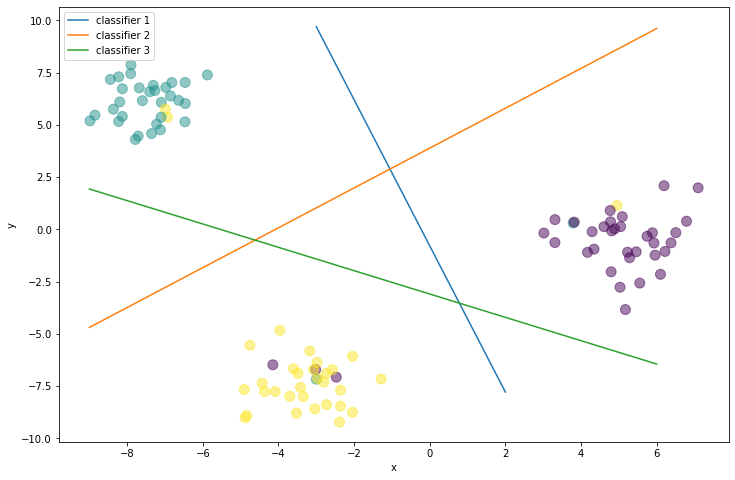

In [114]:
plot2D( x,y,classifiers)

>## Predictions

In [115]:
# Nous pouvons évaluer les estimations de probabilité de notre
# modèle optimisé pour chaque classe comme suit :
classProbabilities = X @ classifiers.transpose()

In [116]:
# Nous pouvons connaître les prédictions de notre modèle en sélectionnant simplement l'étiquette 
# avec la probabilité la plus élevée dans chaque ligne :
predictions = classProbabilities.argmax(axis=1)

>## Accuracy

In [117]:
print("Training accuracy:", str(100 * np.mean(predictions == y)) + "%")

Training accuracy: 92.0%


<a id = "6"></a><br>
# <font color="green"><u> VI. Training & Testing for data no linear separable :</u></font>

> ## Training

In [118]:
x, y = df_n_l_s[['x1','x2']].to_numpy(), df_l_s_n['y'].to_numpy()

In [119]:
X = PolynomialExpansion( x, 9)

the combinations are  =  [(0,), (1,), (0, 0), (0, 1), (1, 1), (0, 0, 0), (0, 0, 1), (0, 1, 1), (1, 1, 1), (0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 1), (0, 1, 1, 1), (1, 1, 1, 1), (0, 0, 0, 0, 0), (0, 0, 0, 0, 1), (0, 0, 0, 1, 1), (0, 0, 1, 1, 1), (0, 1, 1, 1, 1), (1, 1, 1, 1, 1), (0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 1, 1), (0, 0, 0, 1, 1, 1), (0, 0, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1), (0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1), (0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1), (0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 0, 1, 1, 

In [120]:
numFeatures = X.shape[ 1 ] # 2 caractéristiques
numLabels = 3  # 3 class

In [121]:
#  Créons un tableau pour stocker les paramètres du modèle w pour chaque classificateu
classifiers = np.zeros(shape=(numLabels, numFeatures ))

In [122]:
# Then we’re going to train 3 binary classifiers targeted for each class inside a for loop:
for c in range(0, numLabels):
    label = (y == c).astype(int)
    initial_w = np.ones(X.shape[1])
    classifiers[c, :] = Adaline(initial_w, X, label, max_iter=200)

>## Predictions

In [123]:
# Nous pouvons évaluer les estimations de probabilité de notre
# modèle optimisé pour chaque classe comme suit :
classProbabilities = X @ classifiers.transpose()

In [124]:
# Nous pouvons connaître les prédictions de notre modèle en sélectionnant simplement l'étiquette 
# avec la probabilité la plus élevée dans chaque ligne :
predictions = classProbabilities.argmax(axis=1)

>## Accuracy

In [125]:
print("Training accuracy:", str(100 * np.mean(predictions == y)) + "%")

Training accuracy: 35.0%
